# Training

Training is the process of adjusting the parameters of a model to minimize a loss function. It involves iterating over a dataset in mini-batches, performing forward and backward passes to compute the gradients, and updating the model parameters with an optimizer. The typical training loop consists of the following steps.

- Move the model parameters to the desired device (CPU or GPU).

- Loop through the dataset in mini-batches using a DataLoader.

- Perform the following steps for each mini-batch.

  - Set the model to training mode.

  - Move inputs and labels to the desired device (CPU or GPU).

  - Perform a forward pass to compute the model predictions.

  - Calculate the loss using a criterion (e.g., cross-entropy loss).

  - Perform a backward pass to compute gradients.

  - Update the model parameters using the optimizer.

  - Zero out the parameter gradients.

- Optionally, evaluate the model on a validation set.

For a more detailed explanation of this topic, you can refer to [this tutorial](../tutorials/mlp/mlp-3.ipynb) and [this tutorial](../tutorials/cnn/cnn-1.ipynb).

## Function `train_step`

This function trains a model on a single batch of data. It takes the model, a batch of inputs and targets, the loss function, the optimizer, and the device where the data should be sent. It performs the forward and backward passes, updates the model parameters, and returns the loss computed on the batch.

The `train_step` function is defined in the [`train.py`](../code/train.py) script.

In [1]:
import sys
sys.path.append('../code')

from display import print_code
print_code('train_step')

def train_step(model: torch.nn.Module, 
               batch: tuple[torch.Tensor, torch.Tensor],
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               device: torch.device) -> float:
    """Trains the model on a single batch of data. Returns the loss."""
    
    # Unpack the batch
    inputs, labels = batch

    # Send data to device
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(inputs)

    # Compute loss
    loss = loss_fn(outputs, labels)

    # Backward pass
    loss.backward()

    # Update model
    optimizer.step()
    optimizer.zero_grad()

    return loss.item()

## Function `trainer`

This is the function that you will call to train a model for a specified number of epochs. It takes the model, the data loader, the loss function, the optimizer, and the number of epochs. It trains the model by iterating over the dataset in mini-batches and performing the `train_step` function.

The `trainer` function is defined in the [`train.py`](../code/train.py) script.

## Usage example

Let's demonstrate how to use the `trainer` function to train a simple network on the MNIST dataset. We start by importing the required libraries and classes.

In [2]:
import torch
from torch.utils.data import DataLoader
from torch.nn import Sequential, Linear, ReLU, Flatten, CrossEntropyLoss
from torchvision.datasets import MNIST
from torchvision.transforms import v2
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../code') # folder with the train.py file

from train import trainer

Then, we load the MNIST dataset with a minimal preprocessing pipeline that converts the images to tensors.

In [4]:
preprocess = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])

train_ds = MNIST('.data', train=True,  download=True, transform=preprocess)

Next, we define the model, loss function, optimizer, and data loader.

In [5]:
model = Sequential(
    Flatten(),
    Linear(28*28, 128),
    ReLU(),
    Linear(128, 10)
)

loader = DataLoader(train_ds, batch_size=64, shuffle=True)
loss_fn = CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Finally, we train the model for 5 epochs.

In [6]:
history = trainer(model, loader, loss_fn, optimizer, epochs=5)

Epoch  5/5: 100%|██████████| 938/938 [00:31<00:00, 29.75it/s, train_loss=0.0643]


The `trainer` function returns a dictionary containing the training loss for each epoch. We can plot this information to visualize the training progress.

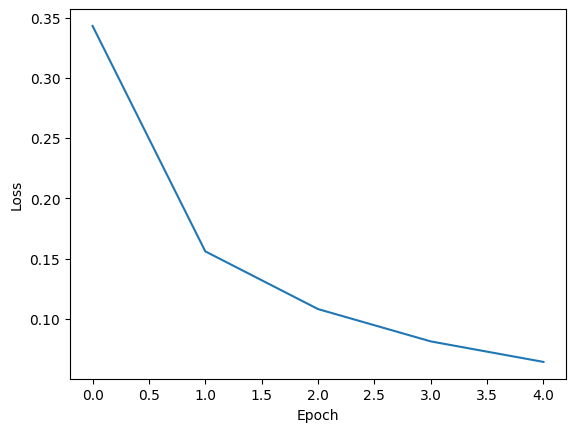

In [7]:
plt.plot(history['train'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()